#          Hateful Memes Classification

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Reading the dataset from jsonl file
train_data = pd.read_json("data/train.jsonl",lines=True)
test_data = pd.read_json("data/dev.jsonl",lines=True)

In [3]:
train_data.shape

(8500, 4)

In [4]:
test_data.shape

(500, 4)

In [5]:
train_data.head(10)

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
5,16952,img/16952.png,0,go sports! do the thing! win the points!
6,76932,img/76932.png,0,fine you're right. now can we fucking drop it?
7,70914,img/70914.png,0,tattoos are bad for your health i know 5 milli...
8,2973,img/02973.png,0,how long can i run? till the chain tightens
9,58306,img/58306.png,0,what is he hiding? we need to see his tax retu...


In [6]:
test_data.head(10)

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime
5,5279,img/05279.png,1,"knowing white people , that's probably the bab..."
6,1796,img/01796.png,1,life hack #23 how to get stoned with no weed
7,53046,img/53046.png,1,"you've heard of elf on a shelf, now get ready for"
8,82301,img/82301.png,1,cooooooooooooon!!!!
9,31752,img/31752.png,1,when you get to choose your own mental illness


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8500 non-null   int64 
 1   img     8500 non-null   object
 2   label   8500 non-null   int64 
 3   text    8500 non-null   object
dtypes: int64(2), object(2)
memory usage: 265.8+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      500 non-null    int64 
 1   img     500 non-null    object
 2   label   500 non-null    int64 
 3   text    500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [9]:
train_data.dtypes

id        int64
img      object
label     int64
text     object
dtype: object

In [10]:
test_data.dtypes

id        int64
img      object
label     int64
text     object
dtype: object

In [11]:
train_data.isna().sum()

id       0
img      0
label    0
text     0
dtype: int64

In [12]:
test_data.isna().sum()

id       0
img      0
label    0
text     0
dtype: int64

In [13]:
train_data.label.value_counts()

0    5450
1    3050
Name: label, dtype: int64

In [14]:
test_data.label.value_counts()

1    250
0    250
Name: label, dtype: int64

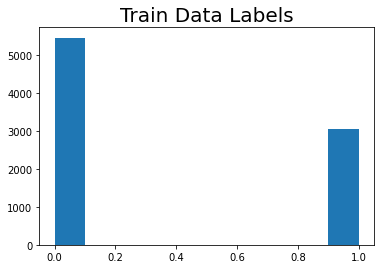

In [15]:
plt.hist(train_data.label)
plt.title('Train Data Labels',fontsize=20)
plt.show()

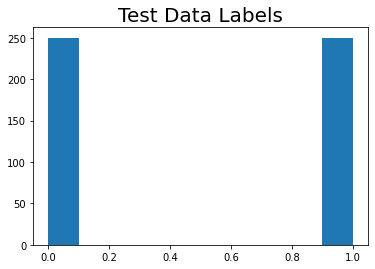

In [16]:
plt.hist(test_data.label)
plt.title('Test Data Labels',fontsize=20)
plt.show()

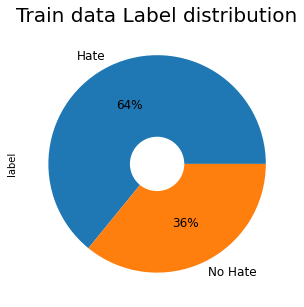

In [17]:
plt.figure(figsize=(20,5))
plt.title('Train data Label distribution', fontsize=20)
train_data.label.value_counts().plot(kind='pie', labels=['Hate', 'No Hate'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%', 
                              textprops={'fontsize': 12})
plt.show()

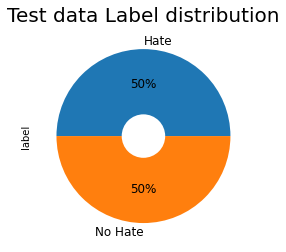

In [18]:
plt.title('Test data Label distribution', fontsize=20)
test_data.label.value_counts().plot(kind='pie', labels=['Hate', 'No Hate'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%', 
                              textprops={'fontsize': 12})
plt.show()

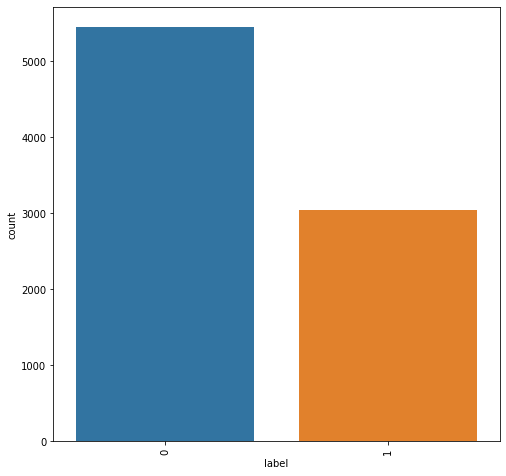

In [19]:
plt.figure(figsize=(8,8))
sn=sns.countplot(train_data['label'])
plt.xticks(rotation=90)
plt.show()

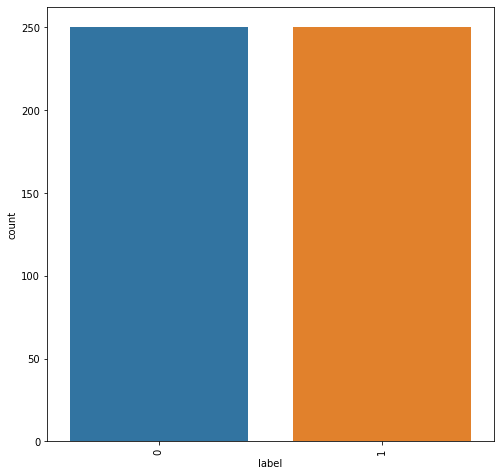

In [20]:
plt.figure(figsize=(8,8))
sn=sns.countplot(test_data['label'])
plt.xticks(rotation=90)
plt.show()

## Training Data:

Total number of memes: 8500\
Total number of hateful memes: 5450\
Total number of non-hateful memes: 3050

## Test Data:

Total number of memes: 500\
Total number of hateful memes: 250\
Total number of non-hateful memes: 250

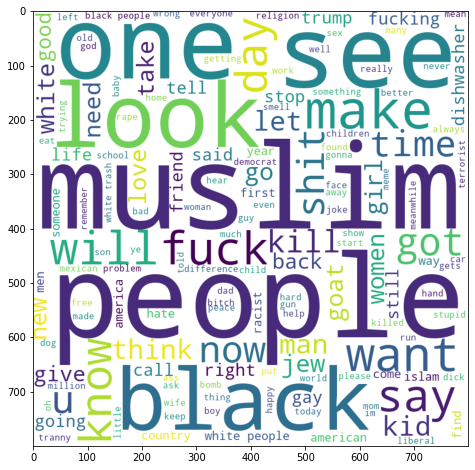

In [21]:
import nltk
from wordcloud import WordCloud
allwords = " ".join(train_data['text'].values)
word_cloud = WordCloud().generate(allwords)

word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).generate(allwords)

plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

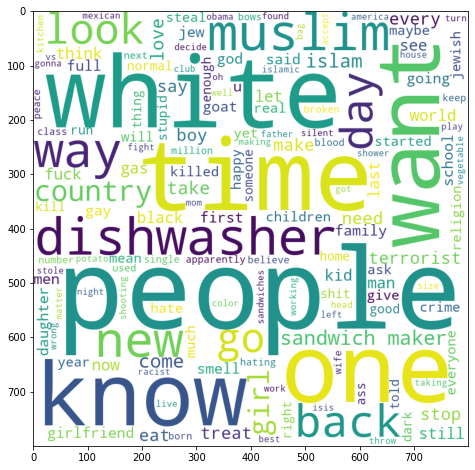

In [22]:
allwords = " ".join(test_data['text'].values)
word_cloud = WordCloud().generate(allwords)

word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).generate(allwords)

plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [23]:
from tqdm import tqdm
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Rolly
[nltk_data]     kumari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rolly
[nltk_data]     kumari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
contractions = {
"ain't": "are not",
"aren't": "are not",
"can't": "can not",
"can't've": "can not have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [25]:
from nltk.corpus import stopwords
all_stop_words = \
['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [26]:
import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()
all_stop_words_base = [ps.stem(w) for w in all_stop_words]

def expand_short_forms(word):
    if(word.lower() in contractions):
        return contractions[word.lower()]
    else:
        return word

def remove_special_chars_except_apostrophe(sentence):
    return re.sub(r"[^\w\d'\s]+",'',sentence.lower())

# remove special chars
# split into words
# get base form of words
# expand short forms

def clean_text_keep_stop_words(text):
    sent = re.sub(r"[^\w\d'\s]+",'',text.lower()) # remove special chars excecpt apostrophe
    words = sent.split() 
    base_words = [ps.stem(w) for w in words] # get stem words convert in base forms
    
    base_words_expanded = []
    for w in base_words:
        if w in contractions:
            base_words_expanded.append(contractions[w])
        else:
            base_words_expanded.append(w)
        
        sent = " ".join(base_words_expanded)
            
    return sent


def clean_text_and_all_stop_words(text):
    sent = clean_text_keep_stop_words(text)
    words = sent.split()
    clean_words = []
    for w in words:
        if w not in all_stop_words_base:
            clean_words.append(w)
    
    sent = " ".join(clean_words)       
    return sent

filter_words = ["meme", "http", "www"]
def filter_words_after_cleaning(text):
    words = text.split()
    filtered_words = []
    for w in words:
        flg = 0
        for fw in filter_words:
            if fw in w:
                flg = 1
                break
            if 'com' in w and len(w) > 7:
                flg = 1
        
        if flg == 0:
            filtered_words.append(w)
        
    sent = " ".join(filtered_words)
    return sent

In [27]:
new_data1 = pd.read_json("data/train.jsonl", lines=True) # with all stop words
new_data2 = pd.read_json("data/train.jsonl", lines=True) # without all stop words

new_data1['clean text'] = new_data1['text'].apply(clean_text_keep_stop_words)
new_data2['clean text'] = new_data2['text'].apply(clean_text_and_all_stop_words)

new_data1['clean text final'] = new_data1['clean text'].apply(filter_words_after_cleaning)        
new_data2['clean text final'] = new_data2['clean text'].apply(filter_words_after_cleaning)

new_data1.drop(['text', 'clean text'], axis = 1, inplace = True)
new_data2.drop(['text', 'clean text'], axis = 1, inplace = True)

new_data1.rename(columns={'label' : 'label', 'clean text final' : 'text'}, inplace = True)
new_data2.rename(columns={'label' : 'label', 'clean text final' : 'text'}, inplace = True)

In [28]:
new_data1.head()

,id,img,label,text
0,42953,img/42953.png,0,it their charact not their color that matter
1,23058,img/23058.png,0,do not be afraid to love again everyon is not ...
2,13894,img/13894.png,0,put bow on your pet
3,37408,img/37408.png,0,i love everyth and everybodi except for squirr...
4,82403,img/82403.png,0,everybodi love chocol chip cooki even hitler


In [29]:
new_data2.head()

,id,img,label,text
0,42953,img/42953.png,0,charact color matter
1,23058,img/23058.png,0,afraid love everyon like ex
2,13894,img/13894.png,0,put bow pet
3,37408,img/37408.png,0,love everyth everybodi except squirrel hate sq...
4,82403,img/82403.png,0,everybodi love chocol chip cooki even hitler


In [30]:
accuracy = []

In [31]:
from sklearn.metrics import f1_score

acc1 = [] # Accuracy of models on CleanText1
acc2 = [] # Accuracy of models on CleanText2

f1_score1 = []
f1_score2 = []

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

#Train Test split of 3 datasets

X1 = new_data1['text'].values
X2 = new_data2['text'].values

y = train_data['label'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y , test_size = 0.2, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y , test_size = 0.2, random_state = 42)

In [33]:
#Applying unigram technique
tfidf_vectorizer_uni = TfidfVectorizer(max_features=3000)

#Training of data with all stop words
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X1_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X1_test)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_uni, y1_train)

predictions_SVM_uni = svclassifier.predict(X_test_tfidf_uni)

acc1.append(accuracy_score(predictions_SVM_uni, y1_test)*100)
f1_score1.append(f1_score(predictions_SVM_uni,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X2_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X2_test)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_uni, y2_train)

predictions_SVM_uni = svclassifier.predict(X_test_tfidf_uni)

acc2.append(accuracy_score(predictions_SVM_uni, y2_test)*100)
f1_score2.append(f1_score(predictions_SVM_uni,y2_test, average='weighted'))

In [34]:
#Applying bigram technique
tfidf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), max_features=10000)

#Training of data with all stop words
X_train_tfidf_bi = tfidf_vectorizer_bi.fit_transform(X1_train)
X_test_tfidf_bi = tfidf_vectorizer_bi.transform(X1_test)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_bi, y1_train)

predictions_SVM = svclassifier.predict(X_test_tfidf_bi)

acc1.append(accuracy_score(predictions_SVM, y1_test)*100)
f1_score1.append(f1_score(predictions_SVM,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_bi1 = tfidf_vectorizer_bi.fit_transform(X2_train)
X_test_tfidf_bi1 = tfidf_vectorizer_bi.transform(X2_test)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_bi1, y2_train)

predictions_SVM = svclassifier.predict(X_test_tfidf_bi1)

acc2.append(accuracy_score(predictions_SVM, y2_test)*100)
f1_score2.append(f1_score(predictions_SVM,y2_test, average='weighted'))

In [35]:
#Applying trigram technique
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3,3), max_features=10000)

#Training of data with all stop words
X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X1_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X1_test)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_tri, y1_train)

predictions_SVM = svclassifier.predict(X_test_tfidf_tri)

acc1.append(accuracy_score(predictions_SVM, y1_test)*100)
f1_score1.append(f1_score(predictions_SVM,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X2_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X2_test)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_tri, y2_train)

predictions_SVM = svclassifier.predict(X_test_tfidf_tri)

acc2.append(accuracy_score(predictions_SVM, y2_test)*100)
f1_score2.append(f1_score(predictions_SVM,y2_test, average='weighted'))

In [36]:
models = ['SVM-1gram', 'SVM-2gram', 'SVM-3gram']
model_test_scores = pd.DataFrame(list(zip(models,acc1,acc2)), columns = ['model', \
                                'w all stop words', 'w/o all stop words'])
display("Accuracy",model_test_scores.head())

'Accuracy'

,model,w all stop words,w/o all stop words
0,SVM-1gram,70.470588,69.470588
1,SVM-2gram,61.588235,62.235294
2,SVM-3gram,61.823529,59.882353


In [37]:
models = ['SVM-1gram', 'SVM-2gram', 'SVM-3gram']
model_test_scores = pd.DataFrame(list(zip(models,f1_score1,f1_score2)), columns = ['model', \
                                'w all stop words', 'w/o all stop words'])
display('f1-score',model_test_scores.head())

'f1-score'

,model,w all stop words,w/o all stop words
0,SVM-1gram,0.730599,0.719305
1,SVM-2gram,0.668191,0.680021
2,SVM-3gram,0.711318,0.690178


In [81]:
print(svclassifier.predict(X_test_tfidf_tri[0]))

[0]


In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
acc11 = [] # Accuracy of models on CleanText1
acc21 = [] # Accuracy of models on CleanText2

f1_score11 = []
f1_score21 = []

In [40]:
#Applying unigram technique
tfidf_vectorizer_uni = TfidfVectorizer(max_features=3000)

#Training of data with all stop words
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X1_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X1_test)
X_train1 = X_train_tfidf_uni.toarray()
X_test1 = X_test_tfidf_uni.toarray()

gnb = GaussianNB()
gnb.fit(X_train1, y1_train)

predictions_gnb_uni = gnb.predict(X_test1)

acc11.append(accuracy_score(predictions_gnb_uni, y1_test)*100)
f1_score11.append(f1_score(predictions_gnb_uni,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_uni1 = tfidf_vectorizer_uni.fit_transform(X2_train)
X_test_tfidf_uni1 = tfidf_vectorizer_uni.transform(X2_test)
X_train2 = X_train_tfidf_uni1.toarray()
X_test2 = X_test_tfidf_uni1.toarray()

gnb = GaussianNB()
gnb.fit(X_train2, y2_train)

predictions_gnb_uni = gnb.predict(X_test2)

acc21.append(accuracy_score(predictions_gnb_uni, y2_test)*100)
f1_score21.append(f1_score(predictions_gnb_uni,y2_test, average='weighted'))

In [41]:
#Applying bigram technique
tfidf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), max_features=10000)

#Training of data with all stop words
X_train_tfidf_bi = tfidf_vectorizer_bi.fit_transform(X1_train)
X_test_tfidf_bi = tfidf_vectorizer_bi.transform(X1_test)
X_train1 = X_train_tfidf_bi.toarray()
X_test1 = X_test_tfidf_bi.toarray()

gnb = GaussianNB()
gnb.fit(X_train1, y1_train)

predictions_gnb = gnb.predict(X_test1)

acc11.append(accuracy_score(predictions_gnb, y1_test)*100)
f1_score11.append(f1_score(predictions_gnb,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_bi1 = tfidf_vectorizer_bi.fit_transform(X2_train)
X_test_tfidf_bi1 = tfidf_vectorizer_bi.transform(X2_test)
X_train2 = X_train_tfidf_bi1.toarray()
X_test2 = X_test_tfidf_bi1.toarray()

gnb = GaussianNB()
gnb.fit(X_train2, y2_train)

predictions_gnb = gnb.predict(X_test2)

acc21.append(accuracy_score(predictions_gnb, y2_test)*100)
f1_score21.append(f1_score(predictions_gnb,y2_test, average='weighted'))

In [42]:
#Applying trigram technique
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3,3), max_features=10000)

#Training of data with all stop words
X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X1_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X1_test)
X_train1 = X_train_tfidf_tri.toarray()
X_test1 = X_test_tfidf_tri.toarray()

gnb = GaussianNB()
gnb.fit(X_train1, y1_train)

predictions_gnb = gnb.predict(X_test1)

acc11.append(accuracy_score(predictions_gnb, y1_test)*100)
f1_score11.append(f1_score(predictions_gnb,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X2_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X2_test)
X_train2 = X_train_tfidf_tri.toarray()
X_test2 = X_test_tfidf_tri.toarray()

gnb = GaussianNB()
gnb.fit(X_train2, y2_train)

predictions_gnb = gnb.predict(X_test2)
acc21.append(accuracy_score(predictions_gnb, y2_test)*100)
f1_score21.append(f1_score(predictions_gnb,y2_test, average='weighted'))

In [43]:
models = ['Naive-1gram', 'Naive-2gram', 'Naive-3gram']
model_test_scores = pd.DataFrame(list(zip(models,acc11,acc21)), columns = ['model', \
                                'w all stop words', 'w/o all stop words'])
display("Accuracy",model_test_scores.head())

'Accuracy'

,model,w all stop words,w/o all stop words
0,Naive-1gram,41.235294,41.000000
1,Naive-2gram,41.941176,36.882353
2,Naive-3gram,37.764706,33.000000


In [44]:
models = ['Naive-1gram', 'Naive-2gram', 'Naive-3gram']
model_test_scores = pd.DataFrame(list(zip(models,f1_score11,f1_score21)), columns = ['model', \
                                'w all stop words', 'w/o all stop words'])
display('f1-score',model_test_scores.head())

'f1-score'

,model,w all stop words,w/o all stop words
0,Naive-1gram,0.469499,0.465856
1,Naive-2gram,0.433645,0.419296
2,Naive-3gram,0.435773,0.424077


In [ ]:
print(gnb.predict(X_test1[0]))

In [45]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [46]:
acc12 = [] # Accuracy of models on CleanText1
acc22 = [] # Accuracy of models on CleanText2

f1_score12 = []
f1_score22 = []

In [47]:
#Applying unigram technique
tfidf_vectorizer_uni = TfidfVectorizer(max_features=3000)

#Training of data with all stop words
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X1_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X1_test)
X_train1 = X_train_tfidf_uni.toarray()
X_test1 = X_test_tfidf_uni.toarray()

xgb_model1=XGBClassifier()
xgb_model1.fit(X_train1,y1_train)

predictions_xgb_uni = xgb_model1.predict(X_test1)

acc12.append(accuracy_score(predictions_xgb_uni, y1_test)*100)
f1_score12.append(f1_score(predictions_xgb_uni,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_uni1 = tfidf_vectorizer_uni.fit_transform(X2_train)
X_test_tfidf_uni1 = tfidf_vectorizer_uni.transform(X2_test)
X_train2 = X_train_tfidf_uni1.toarray()
X_test2 = X_test_tfidf_uni1.toarray()

xgb_model1=XGBClassifier()
xgb_model1.fit(X_train2,y2_train)

predictions_xgb_uni = xgb_model1.predict(X_test2)

acc22.append(accuracy_score(predictions_xgb_uni, y2_test)*100)
f1_score22.append(f1_score(predictions_xgb_uni,y2_test, average='weighted'))

In [48]:
#Applying bigram technique
tfidf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), max_features=10000)

#Training of data with all stop words
X_train_tfidf_bi = tfidf_vectorizer_bi.fit_transform(X1_train)
X_test_tfidf_bi = tfidf_vectorizer_bi.transform(X1_test)
X_train1 = X_train_tfidf_bi.toarray()
X_test1 = X_test_tfidf_bi.toarray()

xgb_model1=XGBClassifier()
xgb_model1.fit(X_train1,y1_train)

predictions_xgb = xgb_model1.predict(X_test1)

acc12.append(accuracy_score(predictions_xgb, y1_test)*100)
f1_score12.append(f1_score(predictions_xgb,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_bi1 = tfidf_vectorizer_bi.fit_transform(X2_train)
X_test_tfidf_bi1 = tfidf_vectorizer_bi.transform(X2_test)
X_train2 = X_train_tfidf_bi1.toarray()
X_test2 = X_test_tfidf_bi1.toarray()

xgb_model1=XGBClassifier()
xgb_model1.fit(X_train2,y2_train)

predictions_xgb = xgb_model1.predict(X_test2)

acc22.append(accuracy_score(predictions_xgb, y2_test)*100)
f1_score22.append(f1_score(predictions_xgb,y2_test, average='weighted'))

In [49]:
#Applying trigram technique
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3,3), max_features=10000)

#Training of data with all stop words
X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X1_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X1_test)
X_train1 = X_train_tfidf_tri.toarray()
X_test1 = X_test_tfidf_tri.toarray()

xgb_model1=XGBClassifier()
xgb_model1.fit(X_train1,y1_train)

predictions_xgb = xgb_model1.predict(X_test1)

acc12.append(accuracy_score(predictions_xgb, y1_test)*100)
f1_score12.append(f1_score(predictions_xgb,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X2_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X2_test)
X_train2 = X_train_tfidf_tri.toarray()
X_test2 = X_test_tfidf_tri.toarray()

xgb_model1=XGBClassifier()
xgb_model1.fit(X_train2,y2_train)

predictions_xgb = xgb_model1.predict(X_test2)
acc22.append(accuracy_score(predictions_xgb, y2_test)*100)
f1_score22.append(f1_score(predictions_xgb,y2_test, average='weighted'))

In [50]:
models = ['Xgb-1gram', 'Xgb-2gram', 'Xgb-3gram']
model_test_scores = pd.DataFrame(list(zip(models,acc12,acc22)), columns = ['model', \
                                'w all stop words', 'w/o all stop words'])
display("Accuracy",model_test_scores.head())

'Accuracy'

,model,w all stop words,w/o all stop words
0,Xgb-1gram,69.705882,70.764706
1,Xgb-2gram,64.529412,64.352941
2,Xgb-3gram,62.235294,63.176471


In [51]:
models = ['Xgb-1gram', 'Xgb-2gram', 'Xgb-3gram']
model_test_scores = pd.DataFrame(list(zip(models,f1_score12,f1_score22)), columns = ['model', \
                                'w all stop words', 'w/o all stop words'])
display('f1-score',model_test_scores.head())

'f1-score'

,model,w all stop words,w/o all stop words
0,Xgb-1gram,0.722318,0.734286
1,Xgb-2gram,0.722531,0.731491
2,Xgb-3gram,0.737466,0.762537


In [86]:
X_test1.shape

(1700, 3000)

In [89]:
print(xgb_model1.predict(X_test_tfidf_tri[0]))
print(predictions_xgb)

[0]
[0 0 0 ... 0 0 0]


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
acc13 = [] # Accuracy of models on CleanText1
acc23 = [] # Accuracy of models on CleanText2

f1_score13 = []
f1_score23 = []

In [54]:
#Applying unigram technique
tfidf_vectorizer_uni = TfidfVectorizer(max_features=3000)

#Training of data with all stop words
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X1_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X1_test)
X_train1 = X_train_tfidf_uni.toarray()
X_test1 = X_test_tfidf_uni.toarray()

clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train1, y1_train)

predictions_clf_uni = clf.predict(X_test1)

acc13.append(accuracy_score(predictions_clf_uni, y1_test)*100)
f1_score13.append(f1_score(predictions_clf_uni,y1_test, average='weighted'))


#Training of data without all stop words
X_train_tfidf_uni1 = tfidf_vectorizer_uni.fit_transform(X2_train)
X_test_tfidf_uni1 = tfidf_vectorizer_uni.transform(X2_test)
X_train2 = X_train_tfidf_uni1.toarray()
X_test2 = X_test_tfidf_uni1.toarray()

clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train2, y2_train)

predictions_clf_uni = clf.predict(X_test2)

acc23.append(accuracy_score(predictions_clf_uni, y2_test)*100)
f1_score23.append(f1_score(predictions_clf_uni,y2_test, average='weighted'))

In [55]:
# #Applying bigram technique
# tfidf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), max_features=10000)

# #Training of data with all stop words
# X_train_tfidf_bi = tfidf_vectorizer_bi.fit_transform(X1_train)
# X_test_tfidf_bi = tfidf_vectorizer_bi.transform(X1_test)
# X_train1 = X_train_tfidf_bi.toarray()
# X_test1 = X_test_tfidf_bi.toarray()

# clf = RandomForestClassifier(n_estimators = 100) 
# clf.fit(X_train1, y1_train)

# predictions_clf = clf.predict(X_test1)

# acc13.append(accuracy_score(predictions_clf, y1_test)*100)
# f1_score13.append(f1_score(predictions_clf,y1_test, average='weighted'))


# #Training of data without all stop words
# X_train_tfidf_bi1 = tfidf_vectorizer_bi.fit_transform(X2_train)
# X_test_tfidf_bi1 = tfidf_vectorizer_bi.transform(X2_test)
# X_train2 = X_train_tfidf_bi1.toarray()
# X_test2 = X_test_tfidf_bi1.toarray()

# clf = RandomForestClassifier(n_estimators = 100) 
# clf.fit(X_train2, y2_train)

# predictions_xgb = xgb_model1.predict(X_test2)

# acc22.append(accuracy_score(predictions_xgb, y2_test)*100)
# f1_score22.append(f1_score(predictions_xgb,y2_test, average='weighted'))

In [56]:
# #Applying trigram technique
# tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3,3), max_features=10000)

# #Training of data with all stop words
# X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X1_train)
# X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X1_test)
# X_train1 = X_train_tfidf_tri.toarray()
# X_test1 = X_test_tfidf_tri.toarray()

# clf = RandomForestClassifier(n_estimators = 100) 
# clf.fit(X_train1, y1_train)

# predictions_clf = clf.predict(X_test1)

# acc13.append(accuracy_score(predictions_clf, y1_test)*100)
# f1_score13.append(f1_score(predictions_clf,y1_test, average='weighted'))


# #Training of data without all stop words
# X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X2_train)
# X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X2_test)
# X_train2 = X_train_tfidf_tri.toarray()
# X_test2 = X_test_tfidf_tri.toarray()

# clf = RandomForestClassifier(n_estimators = 100) 
# clf.fit(X_train2, y2_train)

# predictions_clf = clf_model1.predict(X_test2)
# acc23.append(accuracy_score(predictions_clf, y2_test)*100)
# f1_score23.append(f1_score(predictions_clf,y2_test, average='weighted'))

In [ ]:
print(clf.predict(X_test1[0]))

In [57]:
models = ['Rand-1gram']
model_test_scores = pd.DataFrame(list(zip(models,acc13,acc23)), columns = ['model', \
                                'w all stop words', 'w/o all stop words'])
display("Accuracy",model_test_scores.head())

'Accuracy'

,model,w all stop words,w/o all stop words
0,Rand-1gram,62.588235,62.705882


In [58]:
models = ['Rand-1gram']
model_test_scores = pd.DataFrame(list(zip(models,f1_score13,f1_score23)), columns = ['model', \
                                'w all stop words', 'w/o all stop words'])
display('f1-score',model_test_scores.head())

'f1-score'

,model,w all stop words,w/o all stop words
0,Rand-1gram,0.644765,0.638509


In [59]:
import keras
import tensorflow as tf
from keras import optimizers
from keras.models import load_model
from keras.layers import Bidirectional
from keras.layers.core import Reshape, Dropout
from keras.utils.vis_utils import plot_model
import os
# import keras_metrics
from keras.layers import Conv1D, MaxPooling1D, Flatten, GlobalAveragePooling3D
from keras import regularizers 
from sklearn.metrics import confusion_matrix
from keras import regularizers  
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [60]:
# plot accuracy and loss
def plot_history(history):
    accuracy = history.history['accuracy']
    loss = history.history['loss']

    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')

    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

# plot model architecture
def plot_model(model):
    model.summary()
    return tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    )

In [61]:
def build_model_1():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train1.shape[1],)))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
            metrics=['accuracy'],
            optimizer=optimizers.Adam(learning_rate=0.001))
    return model

In [62]:
model_1 = build_model_1()
plot_model(model_1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768256    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 801,281
Trainable params: 801,281
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and i

In [63]:
history = model_1.fit(
    X_train1, y1_train, 
    epochs=10, 
    batch_size=16, 
    verbose=1, 
    shuffle=True
)

Epoch 1/10
425/425 [==============================] - 5s 10ms/step - loss: 0.6339 - accuracy: 0.6525
Epoch 2/10
425/425 [==============================] - 4s 8ms/step - loss: 0.5378 - accuracy: 0.7265
Epoch 3/10
425/425 [==============================] - 4s 10ms/step - loss: 0.4629 - accuracy: 0.7762
Epoch 4/10
425/425 [==============================] - 4s 9ms/step - loss: 0.3956 - accuracy: 0.8022
Epoch 5/10
425/425 [==============================] - 4s 9ms/step - loss: 0.3396 - accuracy: 0.8250
Epoch 6/10
425/425 [==============================] - 4s 10ms/step - loss: 0.2925 - accuracy: 0.8376
Epoch 7/10
425/425 [==============================] - 4s 9ms/step - loss: 0.2616 - accuracy: 0.8437
Epoch 8/10
425/425 [==============================] - 4s 9ms/step - loss: 0.2367 - accuracy: 0.8496
Epoch 9/10
425/425 [==============================] - 4s 9ms/step - loss: 0.2243 - accuracy: 0.8576
Epoch 10/10
425/425 [==============================] - 4s 9ms/step - loss: 0.2142 - accuracy: 0.8

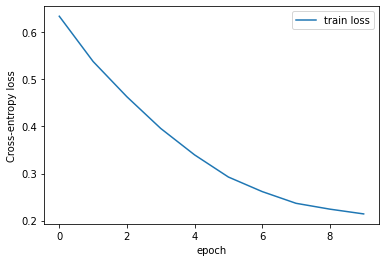

In [64]:
plt.plot(history.history['loss'], label='train loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

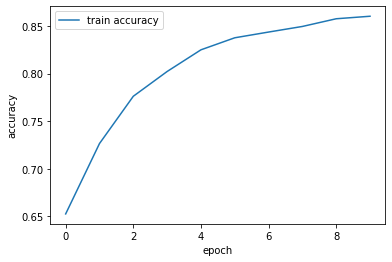

In [65]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

In [66]:
model_1.evaluate(X_test1, y1_test)

54/54 [==============================] - 1s 4ms/step - loss: 1.8184 - accuracy: 0.5959


[1.818390965461731, 0.5958823561668396]

In [101]:
print(model_1.predict(X_test1)[0])

54/54 [==============================] - 0s 2ms/step
[0.8728849]


In [67]:
from numpy import newaxis

#(NumberOfExamples, TimeSteps, FeaturesPerStep)
X_train_reshaped = X_train1[:, newaxis,:]
X_test_reshaped = X_test1[:, newaxis,:]

In [68]:
X_train_reshaped.shape

(6800, 1, 3000)

In [69]:
y1_train.shape

(6800,)

In [70]:
1,X_train_reshaped.shape[2]

(1, 3000)

In [71]:
def build_model_lstm():
    model = Sequential()
    model.add(LSTM(256, activation='sigmoid', return_sequences=True,
                 input_shape=(1,X_train_reshaped.shape[2])
                 ))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy',
            metrics=['accuracy'],
            optimizer=optimizers.Adam(learning_rate=0.0005))
    return model

In [72]:
model_lstm_1 = build_model_lstm()
plot_model(model_lstm_1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            3335168   
                                                                 
 dense_3 (Dense)             (None, 1, 128)            32896     
                                                                 
 dense_4 (Dense)             (None, 1, 1)              129       
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 3,368,193
Trainable params: 3,368,193
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [73]:
history_lstm_1 = model_lstm_1.fit(
    X_train_reshaped, y1_train, 
    epochs=10, 
    batch_size=16,
    verbose=1, 
    shuffle=True # text data, safe to shuffle
)

Epoch 1/10
425/425 [==============================] - 14s 27ms/step - loss: 0.6554 - accuracy: 0.6422
Epoch 2/10
425/425 [==============================] - 12s 28ms/step - loss: 0.6380 - accuracy: 0.6463
Epoch 3/10
425/425 [==============================] - 12s 28ms/step - loss: 0.6016 - accuracy: 0.6718
Epoch 4/10
425/425 [==============================] - 11s 26ms/step - loss: 0.5478 - accuracy: 0.7209
Epoch 5/10
425/425 [==============================] - 11s 26ms/step - loss: 0.5072 - accuracy: 0.7491
Epoch 6/10
425/425 [==============================] - 11s 26ms/step - loss: 0.4799 - accuracy: 0.7634
Epoch 7/10
425/425 [==============================] - 11s 26ms/step - loss: 0.4559 - accuracy: 0.7775
Epoch 8/10
425/425 [==============================] - 11s 26ms/step - loss: 0.4469 - accuracy: 0.7796
Epoch 9/10
425/425 [==============================] - 11s 26ms/step - loss: 0.4362 - accuracy: 0.7850
Epoch 10/10
425/425 [==============================] - 11s 25ms/step - loss: 0.422

In [74]:
def build_model_lstm_2():
    model = Sequential()
    model.add(LSTM(256, activation='relu', return_sequences=True,
                 input_shape=(1,X_train_reshaped.shape[2])
                 ))
    model.add(LSTM(128, dropout=0.2, activation='relu', return_sequences=True))
    model.add(LSTM(64, dropout=0.2, activation='relu',  return_sequences=True))
    model.add(Dense(1, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy',
            metrics=['accuracy'],
            optimizer=optimizers.Adam(learning_rate=0.0005))
    return model

In [75]:
model_lstm_2 = build_model_lstm_2()
plot_model(model_lstm_2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 256)            3335168   
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            197120    
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 3,581,761
Trainable params: 3,581,761
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`)

In [76]:
history = model_lstm_2.fit(
    X_train_reshaped, y1_train, 
    epochs=10, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=True
)

Epoch 1/10
383/383 [==============================] - 20s 33ms/step - loss: 0.6515 - accuracy: 0.6443 - val_loss: 0.6388 - val_accuracy: 0.6353
Epoch 2/10
383/383 [==============================] - 12s 31ms/step - loss: 0.5764 - accuracy: 0.6686 - val_loss: 0.6444 - val_accuracy: 0.6603
Epoch 3/10
383/383 [==============================] - 12s 31ms/step - loss: 0.5049 - accuracy: 0.7431 - val_loss: 0.6994 - val_accuracy: 0.6265
Epoch 4/10
383/383 [==============================] - 12s 31ms/step - loss: 0.4534 - accuracy: 0.7716 - val_loss: 0.8105 - val_accuracy: 0.6221
Epoch 5/10
383/383 [==============================] - 12s 31ms/step - loss: 0.4143 - accuracy: 0.7964 - val_loss: 0.8943 - val_accuracy: 0.5750
Epoch 6/10
383/383 [==============================] - 12s 31ms/step - loss: 0.3812 - accuracy: 0.8127 - val_loss: 1.0102 - val_accuracy: 0.5971
Epoch 7/10
383/383 [==============================] - 12s 31ms/step - loss: 0.3426 - accuracy: 0.8301 - val_loss: 1.0737 - val_accuracy:

In [77]:
model_lstm_2.evaluate(X_test_reshaped, y1_test)

54/54 [==============================] - 0s 7ms/step - loss: 1.2982 - accuracy: 0.6000


[1.2981761693954468, 0.6000000238418579]

In [78]:
model_lstm_1.evaluate(X_test_reshaped, y1_test)

54/54 [==============================] - 1s 5ms/step - loss: 0.7586 - accuracy: 0.6047


[0.7585991621017456, 0.6047058701515198]

In [79]:
models = ['Naive-1gram', 'Naive-2gram', 'Naive-3gram']
model_test_scores = pd.DataFrame(list(zip(models,acc11)), columns = ['model', \
                                'accuracy'])
display("Accuracy",model_test_scores.head())
accuracy.append(acc1)
accuracy.append(acc11)
accuracy.append(acc12)
print(accuracy)

'Accuracy'

,model,accuracy
0,Naive-1gram,41.235294
1,Naive-2gram,41.941176
2,Naive-3gram,37.764706


[[70.47058823529412, 61.588235294117645, 61.82352941176471], [41.23529411764706, 41.94117647058824, 37.76470588235294], [69.70588235294117, 64.52941176470588, 62.23529411764706]]


In [105]:
print(model_lstm_1.predict(X_test_reshaped)[0])

54/54 [==============================] - 0s 5ms/step
[0.79822034]
